# On the Period-Luminosity Relationship of Cepheid Variables

The demo data set is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`.<br>
Name: the identifier of the star<br>
RA: (in decimal hours)<br>
Dec:(in decimal degrees), celestial coordinates<br>
Mode: The mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star)<br>
Cloud: Indicating which Magellanic Cloud the star belongs to<br>
logP1: the base-10 logarithm of the period in days<br>
VI: the colour V-I.<br>

In [51]:
# Read in the csv data file using Pandas
import pandas as pd
pd.options.mode.chained_assignment = None

cep = pd.read_csv("/home/ambica/Downloads/ztf/Cepheids.csv")
print(cep.columns)

Index(['name', 'RA0', 'Decl0', 'Mode', 'Cloud', 'W', 'logP1', 'VI'], dtype='object')


In [52]:
#select Cepheids belonging to the LMC and SMC clouds with F and 1 modes
lmcf = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == 'F')]
smcf = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == 'F')]

lmco = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == '1')]
smco = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == '1')]

## Plot of the `W` on the y-axis vs `log(P1)` on x.

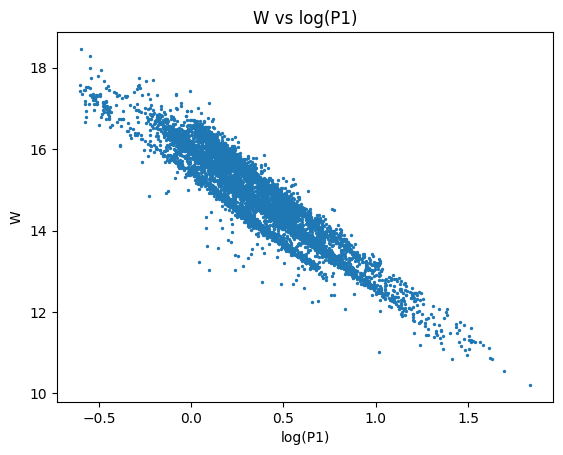

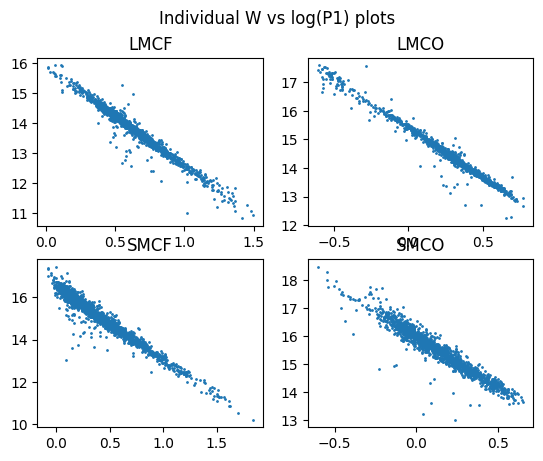

In [53]:
import matplotlib.pyplot as plt

#Plot W vs log(P1) for the entire dataset
plt.scatter(cep['logP1'],cep['W'],s=2)
plt.xlabel('log(P1)')
plt.ylabel('W')
plt.title('W vs log(P1)')
plt.show()

#Store dataframes in an array
df=[lmcf,lmco,smcf,smco]
dfname=['LMCF','LMCO','SMCF','SMCO']

#Create subplots
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.scatter(df[i]['logP1'],df[i]['W'],s=1)
    plt.title(dfname[i])
plt.suptitle('Individual W vs log(P1) plots')
plt.show()



##  Fit or estimate straight lines to each of the four samples


In [54]:
from scipy.optimize import curve_fit

#The straight line to estimate the plots
def func(x,a,b):
    return a*x+b

#Return parameters a,b in the function and covariance matrices
params=[['0' for x in range(2)] for x in range(4)]
covs=[['0' for x in range(2)] for x in range(4)]
for i in range(4):
    params[i],covs[i]=curve_fit(func,df[i]['logP1'],df[i]['W'])
    
print(params)

[array([-3.32588476, 15.89287088]), array([-3.43224338, 15.38395972]), array([-3.45364502, 16.48043801]), array([-3.61548559, 15.96236752])]


## Compute the residuals of each sample to its respective line.

The residuals appear to be normally distributed centred around zero meaning that the regression model as given by the elements of `params` is close to reality, and a linear relationship between the Wesenheit Index and the logarithm of period does exist in actuality. An interpretation can be made as follows: since W is logarithmically dependent on the luminosity, and also linearly dependent on the logarithm of the period, there exists a relationship between the period and the luminosity, and a linear relationship  between the absolute magnitude and the log of the period.


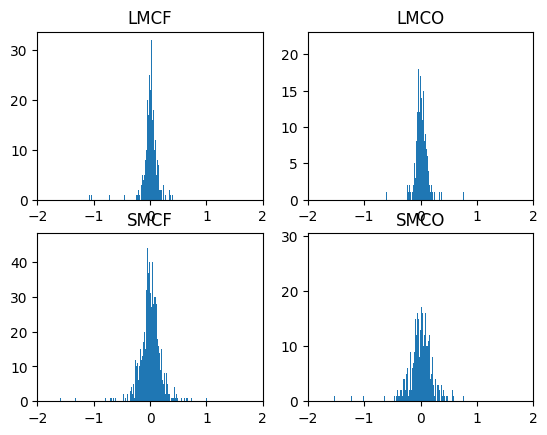

In [55]:
#Calculate residuals for each of the four slices
for i in range(4):
    df[i]['Prediction']=func(df[i]['logP1'],params[i][0],params[i][1])
    df[i]['Residuals']=df[i]['W']-df[i]['Prediction']
    plt.subplot(2,2,i+1)
    plt.hist(df[i]['Residuals'],bins=1000)
    plt.xlim(-2,2)
    plt.title(dfname[i])
    
    

## Scatter plot of the residuals as RA (x-axis) vs Dec (y-axis) color-coded by whether they are positive or negative.

From the nature of the scatterplots one can infer that Cepheid variables are rather randomly distributed across the LMC in terms of their deviations from the prediction(according to the curve fit). In the SMC there seem to be an excess of positive deviation Cepheids with low RA,Dec in both the fundamental mode and first overtone(larger Wesenheit Index than expected). On a whole it also appears that there are more positive deviation Cepheids with fundamental mode.


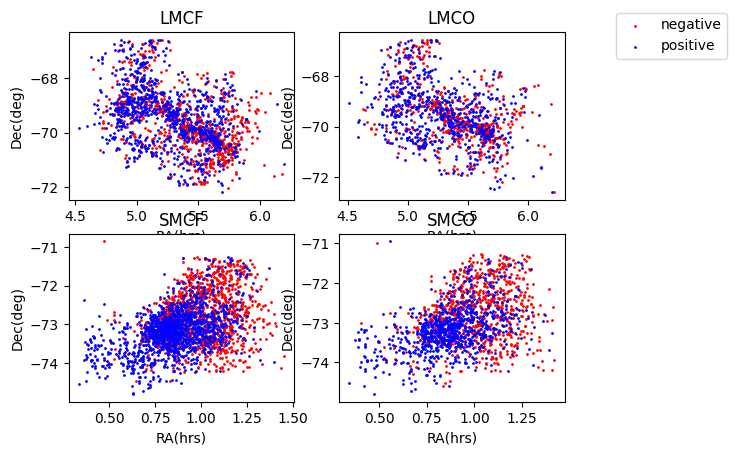

In [56]:
for i in range(4):
    plt.subplot(2,2,i+1)
    
    #Two dataframes for positive and negative residuals
    dfp=df[i][(df[i]['Residuals']>0)]
    dfn=df[i][(df[i]['Residuals']<0)] 
    
    plt.scatter(dfn['RA0'],dfn['Decl0'],color='red',s=1,label='negative')
    plt.scatter(dfp['RA0'],dfp['Decl0'],color='blue',s=1,label='positive')
    plt.xlabel('RA(hrs)')
    plt.ylabel('Dec(deg)')
    plt.title(dfname[i])
    
plt.legend(bbox_to_anchor=(1.75,2),loc='lower right')
plt.show()
    
    